In [1]:
import pandas as pd 
import re
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag

[nltk_data] Downloading package sentiwordnet to C:\Users\Gi
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gi
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Getting nouns and user data

In [2]:
data = pd.read_csv("./Dataset/train_food_noun.csv")
data2 = pd.read_csv("./Dataset/train_dataset_all.csv")

In [3]:
data.head()

,recipe_id,name,review,clean_review,noun_review
0,5315,icy holiday punch,I brought this to an office holiday party and ...,"['brought', 'office', 'holiday', 'party', 'eve...",[]
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...,"['good', 'recipe', 'easy', 'make', 'found', 'l...",[]
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...,"['nice', 'casserole', 'easy', 'put', 'together']",[]
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...,"['easy', 'make', 'lunch', 'served', 'cold', 's...","['cheese', 'cheddar']"
4,8549,taverns,A friend of mine loves ketchup so he loved thi...,"['friend', 'mine', 'loves', 'ketchup', 'loved'...",[]


In [4]:
user = data2[['user_id','review']]
user.head()

,user_id,review
0,8629,I brought this to an office holiday party and ...
1,13483,Good recipe and easy to make. I found it a li...
2,8629,This is a nice casserole. It is very easy to ...
3,13483,Very easy to make for a lunch. I served it co...
4,13483,A friend of mine loves ketchup so he loved thi...


### Creating similarity matrix dataframe using Wu & Palmer

In [5]:
# change noun review to list
def str_to_list(text):
    text = text[1:len(text)-1]
    text_list = text.split(',')
    text_list = [text.strip()[1:-1] for text in text_list]
    return text_list

In [6]:
word_in_wordnet = []
for w in data['noun_review']:
    list_ = str_to_list(w)
    for word in list_:
        try:
            w1 = wn.synsets(word)[0]
            if word not in word_in_wordnet:
                word_in_wordnet.append(word)
        except:
            continue

In [7]:
similarity_matrix = []
for word1 in word_in_wordnet:
    row = []
    for word2 in word_in_wordnet:
        w1 = wn.synsets(str(word1))[0]
        w2 = wn.synsets(str(word2))[0]
        if w1.wup_similarity(w2) == 1:
            row.append(1)
        else:
            row.append(1-w1.wup_similarity(w2))
    similarity_matrix.append(row)

In [8]:
similarity_matrix_df = pd.DataFrame(similarity_matrix,columns = word_in_wordnet,index=word_in_wordnet)

In [9]:
similarity_matrix_df

,cheese,cheddar,go,pie,stuff,desert,side,rice,corn,onion,...,demonstration,dehydrate,convertible,discharge,gloss,pose,coal,lug,legume,brood
cheese,0.125000,0.733333,0.866667,0.285714,0.454545,0.714286,0.666667,0.250000,0.789474,0.750000,...,0.875000,0.846154,0.777778,0.833333,0.846154,0.846154,0.466667,0.875000,0.750000,0.833333
cheddar,0.733333,1.000000,0.888889,0.764706,0.714286,0.294118,0.466667,0.764706,0.727273,0.684211,...,0.894737,0.875000,0.714286,0.866667,0.875000,0.875000,0.714286,0.894737,0.684211,0.866667
go,0.866667,0.888889,1.000000,0.882353,0.733333,0.733333,0.866667,0.882353,0.909091,0.894737,...,0.789474,0.875000,0.904762,0.733333,0.750000,0.750000,0.857143,0.789474,0.894737,0.733333
pie,0.285714,0.764706,0.882353,1.000000,0.538462,0.750000,0.714286,0.625000,0.809524,0.777778,...,0.888889,0.866667,0.800000,0.857143,0.866667,0.866667,0.538462,0.888889,0.777778,0.857143
stuff,0.454545,0.714286,0.733333,0.538462,1.000000,0.666667,0.636364,0.538462,0.777778,0.733333,...,0.750000,0.833333,0.764706,0.666667,0.692308,0.692308,0.400000,0.750000,0.733333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,0.846154,0.875000,0.750000,0.866667,0.692308,0.692308,0.846154,0.866667,0.900000,0.882353,...,0.764706,0.857143,0.894737,0.692308,0.714286,1.000000,0.833333,0.764706,0.882353,0.692308
coal,0.466667,0.714286,0.857143,0.538462,0.400000,0.692308,0.636364,0.466667,0.777778,0.733333,...,0.866667,0.833333,0.764706,0.818182,0.833333,0.833333,0.142857,0.866667,0.733333,0.818182
lug,0.875000,0.894737,0.789474,0.888889,0.750000,0.750000,0.875000,0.888889,0.913043,0.900000,...,0.700000,0.882353,0.909091,0.625000,0.764706,0.764706,0.866667,1.000000,0.900000,0.750000
legume,0.750000,0.684211,0.894737,0.777778,0.733333,0.666667,0.625000,0.777778,0.217391,0.600000,...,0.900000,0.882353,0.636364,0.875000,0.882353,0.882353,0.733333,0.900000,1.000000,0.875000


### Using Dendogram to determine the number of clusters

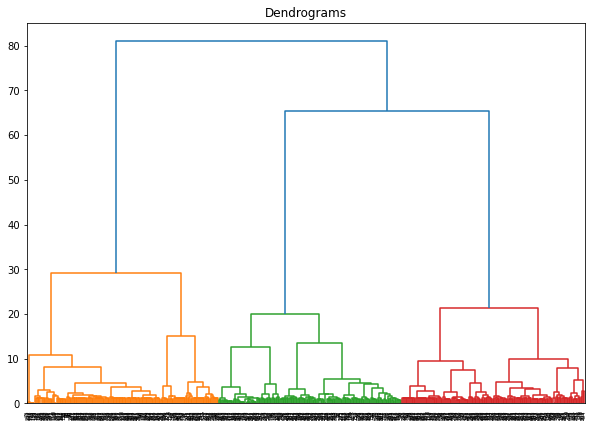

In [10]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(similarity_matrix_df, method='ward'))

In [11]:
n_cluster = 15

model = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage='ward')
model.fit(similarity_matrix_df)
labels = model.labels_

In [29]:
X = similarity_matrix_df

In [30]:
X['cluster_'] = labels

In [31]:
X

,cheese,cheddar,go,pie,stuff,desert,side,rice,corn,onion,...,dehydrate,convertible,discharge,gloss,pose,coal,lug,legume,brood,cluster_
cheese,0.125000,0.733333,0.866667,0.285714,0.454545,0.714286,0.666667,0.250000,0.789474,0.750000,...,0.846154,0.777778,0.833333,0.846154,0.846154,0.466667,0.875000,0.750000,0.833333,12
cheddar,0.733333,1.000000,0.888889,0.764706,0.714286,0.294118,0.466667,0.764706,0.727273,0.684211,...,0.875000,0.714286,0.866667,0.875000,0.875000,0.714286,0.894737,0.684211,0.866667,2
go,0.866667,0.888889,1.000000,0.882353,0.733333,0.733333,0.866667,0.882353,0.909091,0.894737,...,0.875000,0.904762,0.733333,0.750000,0.750000,0.857143,0.789474,0.894737,0.733333,0
pie,0.285714,0.764706,0.882353,1.000000,0.538462,0.750000,0.714286,0.625000,0.809524,0.777778,...,0.866667,0.800000,0.857143,0.866667,0.866667,0.538462,0.888889,0.777778,0.857143,3
stuff,0.454545,0.714286,0.733333,0.538462,1.000000,0.666667,0.636364,0.538462,0.777778,0.733333,...,0.833333,0.764706,0.666667,0.692308,0.692308,0.400000,0.750000,0.733333,0.666667,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pose,0.846154,0.875000,0.750000,0.866667,0.692308,0.692308,0.846154,0.866667,0.900000,0.882353,...,0.857143,0.894737,0.692308,0.714286,1.000000,0.833333,0.764706,0.882353,0.692308,0
coal,0.466667,0.714286,0.857143,0.538462,0.400000,0.692308,0.636364,0.466667,0.777778,0.733333,...,0.833333,0.764706,0.818182,0.833333,0.833333,0.142857,0.866667,0.733333,0.818182,1
lug,0.875000,0.894737,0.789474,0.888889,0.750000,0.750000,0.875000,0.888889,0.913043,0.900000,...,0.882353,0.909091,0.625000,0.764706,0.764706,0.866667,1.000000,0.900000,0.750000,0
legume,0.750000,0.684211,0.894737,0.777778,0.733333,0.666667,0.625000,0.777778,0.217391,0.600000,...,0.882353,0.636364,0.875000,0.882353,0.882353,0.733333,0.900000,1.000000,0.875000,11


### Creating a dictionary of clusters containing words

In [32]:
dict = {}
for i in range(n_cluster):
    dict[i] = X[X['cluster_']==i].index.tolist()
print(dict)

{0: ['go', 'notch', 'let', 'tender', 'proof', 'saw', 'cut', 'give', 'malt', 'keep', 'french', 'dip', 'stock', 'leave', 'picking', 'print', 'catch', 'cube', 'smell', 'check', 'list', 'scale', 'scent', 'bounce', 'mint', 'drop', 'spring', 'slice', 'pack', 'lead', 'pink', 'special', 'date', 'heart', 'offset', 'salute', 'rim', 'mold', 'index', 'club', 'press', 'return', 'abandon', 'theme', 'scallop', 'trim', 'misprint', 'drumstick', 'ticket', 'printout', 'line', 'slash', 'control', 'incision', 'bind', 'preserve', 'fig', 'detail', 'nick', 'fund', 'coral', 'trace', 'stint', 'staff', 'indent', 'bail', 'ante', 'hob', 'foam', 'nightcap', 'blank', 'litter', 'stamp', 'jumble', 'nip', 'chatter', 'prompt', 'intrigue', 'confirmation', 'distance', 'gloss', 'pose', 'lug', 'brood'], 1: ['rice', 'chocolate', 'pasta', 'marzipan', 'spaghetti', 'couscous', 'feed', 'barley', 'caramel', 'fudge', 'butterscotch', 'lasagna', 'pastry', 'jam', 'pickle', 'marshmallow', 'spill', 'brittle', 'patty', 'cannelloni', 'cu

In [33]:
# Count the number of words in each cluster
X.groupby(['cluster_']).count()

,cheese,cheddar,go,pie,stuff,desert,side,rice,corn,onion,...,demonstration,dehydrate,convertible,discharge,gloss,pose,coal,lug,legume,brood
cluster_,,,,,,,,,,,,,,,,,,,,,
0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
1,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
4,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
5,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
6,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
7,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
8,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42


In [34]:
user['processed_review']  = user['review'].map(lambda x: re.sub("[^A-Za-z0-9]+"," ", x))

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
user['cluster_'] = ''

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Assigning users reviews to the clusters

In [36]:
for i, r in user.iterrows():
    review = r['processed_review']
    review_list = review.lower().split()
    unique_words = set(review_list)     # remove repeated noun
    for w in unique_words:
        for k,v in dict.items():
            if w in v:
                if len(user['cluster_'].iloc[i]) == 0:
                    user['cluster_'].iloc[i] = [k]
                elif k not in user['cluster_'].iloc[i]:
                    user['cluster_'].iloc[i].append(k)

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Determining the sentiments of the users for each review

In [37]:
user['sentiment'] = 0

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
for i, r in user.iterrows():
    review = r['processed_review']
    review_list = review.lower().split()
    unique_words = set(review_list)     # remove repeated noun
    sentiment = 0
    for w in unique_words:
        synsets = wn.synsets(w, pos=wn.NOUN)
        if not synsets:
                continue
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
    user['sentiment'].iloc[i] = sentiment

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### Calculating the average sentiment for each user for different clusters

In [39]:
for i in range(n_cluster):
    user[f'sentiment_c{i}'] = np.NaN
user.head()

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,review,processed_review,cluster_,sentiment,sentiment_c0,sentiment_c1,sentiment_c2,sentiment_c3,sentiment_c4,sentiment_c5,sentiment_c6,sentiment_c7,sentiment_c8,sentiment_c9,sentiment_c10,sentiment_c11,sentiment_c12,sentiment_c13,sentiment_c14
0,8629,I brought this to an office holiday party and ...,I brought this to an office holiday party and ...,,-0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13483,Good recipe and easy to make. I found it a li...,Good recipe and easy to make I found it a litt...,,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8629,This is a nice casserole. It is very easy to ...,This is a nice casserole It is very easy to pu...,,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13483,Very easy to make for a lunch. I served it co...,Very easy to make for a lunch I served it cold...,"[12, 2]",0.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13483,A friend of mine loves ketchup so he loved thi...,A friend of mine loves ketchup so he loved thi...,,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
for i, r in user.iterrows():
    for c in r['cluster_']:
        user[f'sentiment_c{c}'].iloc[i] = r['sentiment']

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
user_sentiment_avg = user.groupby(['user_id']).mean()

In [42]:
userid_sentiment = user_sentiment_avg.merge(user,on='user_id')

In [43]:
userid_sentiment.head()

,user_id,sentiment_x,sentiment_c0_x,sentiment_c1_x,sentiment_c2_x,sentiment_c3_x,sentiment_c4_x,sentiment_c5_x,sentiment_c6_x,sentiment_c7_x,...,sentiment_c5_y,sentiment_c6_y,sentiment_c7_y,sentiment_c8_y,sentiment_c9_y,sentiment_c10_y,sentiment_c11_y,sentiment_c12_y,sentiment_c13_y,sentiment_c14_y
0,1535,0.53491,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1535,0.53491,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1535,0.53491,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,1535,0.53491,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1535,0.53491,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
userid_sentiment.columns

Index(['user_id', 'sentiment_x', 'sentiment_c0_x', 'sentiment_c1_x',
       'sentiment_c2_x', 'sentiment_c3_x', 'sentiment_c4_x', 'sentiment_c5_x',
       'sentiment_c6_x', 'sentiment_c7_x', 'sentiment_c8_x', 'sentiment_c9_x',
       'sentiment_c10_x', 'sentiment_c11_x', 'sentiment_c12_x',
       'sentiment_c13_x', 'sentiment_c14_x', 'review', 'processed_review',
       'cluster_', 'sentiment_y', 'sentiment_c0_y', 'sentiment_c1_y',
       'sentiment_c2_y', 'sentiment_c3_y', 'sentiment_c4_y', 'sentiment_c5_y',
       'sentiment_c6_y', 'sentiment_c7_y', 'sentiment_c8_y', 'sentiment_c9_y',
       'sentiment_c10_y', 'sentiment_c11_y', 'sentiment_c12_y',
       'sentiment_c13_y', 'sentiment_c14_y'],
      dtype='object')

In [45]:
final = userid_sentiment[['user_id','sentiment_c0_x','sentiment_c1_x','sentiment_c2_x','sentiment_c3_x','sentiment_c4_x', 'sentiment_c5_x',
       'sentiment_c6_x', 'sentiment_c7_x', 'sentiment_c8_x', 'sentiment_c9_x',
       'sentiment_c10_x', 'sentiment_c11_x', 'sentiment_c12_x',
       'sentiment_c13_x', 'sentiment_c14_x', 'review','processed_review','cluster_']]

In [46]:
final.head()

,user_id,sentiment_c0_x,sentiment_c1_x,sentiment_c2_x,sentiment_c3_x,sentiment_c4_x,sentiment_c5_x,sentiment_c6_x,sentiment_c7_x,sentiment_c8_x,sentiment_c9_x,sentiment_c10_x,sentiment_c11_x,sentiment_c12_x,sentiment_c13_x,sentiment_c14_x,review,processed_review,cluster_
0,1535,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,0.760417,0.360294,0.666667,0.37037,0.522163,0.604651,0.413462,I make this cake all the time and love it. We ...,I make this cake all the time and love it We u...,"[4, 3]"
1,1535,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,0.760417,0.360294,0.666667,0.37037,0.522163,0.604651,0.413462,Very good. I made it as a coffeecake (9-inch s...,Very good I made it as a coffeecake 9 inch sq ...,[3]
2,1535,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,0.760417,0.360294,0.666667,0.37037,0.522163,0.604651,0.413462,I make these muffins a lot as we love them. I ...,I make these muffins a lot as we love them I u...,"[4, 12]"
3,1535,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,0.760417,0.360294,0.666667,0.37037,0.522163,0.604651,0.413462,Love them!! A quick & easy recipe with ingredi...,Love them A quick easy recipe with ingredients...,"[0, 4]"
4,1535,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,0.760417,0.360294,0.666667,0.37037,0.522163,0.604651,0.413462,This cake ended up looking different that I ex...,This cake ended up looking different that I ex...,"[4, 0]"


In [38]:
# final.to_csv('wupalmer_semantic_analysis.csv',index=False)

### Cluster words

In [47]:
dict_series = pd.Series(dict)
cluster_word_df = pd.Series.to_frame(dict_series, name = 'cluster words')
cluster_word_df

,cluster words
0,"[go, notch, let, tender, proof, saw, cut, give..."
1,"[rice, chocolate, pasta, marzipan, spaghetti, ..."
2,"[cheddar, desert, side, top, bottom, sole, ten..."
3,"[pie, leftovers, pork, meat, vegetable, briske..."
4,"[electric, cake, store, bar, bed, grate, ambul..."
5,"[mushroom, beef, salmon, lamb, crab, fish, bir..."
6,"[stuff, filling, water, salt, dust, rind, pape..."
7,"[skip, blast, bother, save, kill, hold, step, ..."
8,"[thin, remember, bring, pour, continue, involv..."
9,"[cling, apple, berry, citrus, avocado, melon, ..."


## Feature Extraction

In [48]:
user_cluster = final.groupby('user_id').mean()
user_cluster

,sentiment_c0_x,sentiment_c1_x,sentiment_c2_x,sentiment_c3_x,sentiment_c4_x,sentiment_c5_x,sentiment_c6_x,sentiment_c7_x,sentiment_c8_x,sentiment_c9_x,sentiment_c10_x,sentiment_c11_x,sentiment_c12_x,sentiment_c13_x,sentiment_c14_x
user_id,,,,,,,,,,,,,,,
1535,0.507772,0.494624,0.384804,0.594008,0.616987,0.367647,0.675987,0.559524,0.760417,0.360294,0.666667,0.370370,0.522163,0.604651,0.413462
4439,0.545455,0.438333,0.368750,0.618976,0.609091,0.440476,0.523438,0.250000,0.400000,0.000000,0.634615,0.393617,0.434295,0.525000,0.145833
6258,0.490031,0.310484,0.473592,0.484043,0.625000,0.727941,0.546296,0.556818,0.718750,0.673611,0.494565,0.528846,0.496462,0.464286,0.414062
8629,0.563889,0.521739,0.488014,0.461207,0.586538,0.491071,0.540948,0.488095,0.697581,0.350000,0.342391,0.406250,0.384091,0.450000,0.221154
13483,0.504630,0.515576,0.433702,0.514313,0.625000,0.582386,0.578552,0.521739,0.479167,0.508929,0.480263,0.510081,0.585106,0.705556,0.343137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844554,0.567460,0.806452,0.294643,0.893750,0.602273,0.725000,0.614286,0.343023,0.700000,0.729167,0.750000,0.531250,0.548780,0.672794,1.000000
860079,0.497475,0.407738,0.283654,0.364224,0.448864,0.767857,0.397727,1.000000,0.562500,0.700000,0.250000,0.602273,0.526163,0.506250,0.302632
865936,0.362745,0.411765,0.576389,0.657143,0.919118,0.553571,0.500000,0.666667,0.458333,0.180556,0.520833,0.620370,0.284091,0.388889,0.166667


In [51]:
selected_cluster = user_cluster.idxmax(axis=1)
selected_cluster

user_id
1535       sentiment_c8_x
4439      sentiment_c10_x
6258       sentiment_c5_x
8629       sentiment_c8_x
13483     sentiment_c13_x
               ...       
844554    sentiment_c14_x
860079     sentiment_c7_x
865936     sentiment_c4_x
869184     sentiment_c8_x
895132    sentiment_c10_x
Length: 124, dtype: object

In [52]:
cluster_num = [re.findall('[0-9]+', x)[0] for x in selected_cluster.values]
cluster_num = set(cluster_num)
print(cluster_num)

{'10', '1', '2', '9', '5', '7', '4', '3', '13', '0', '11', '8', '14', '6'}


In [54]:
extract_feature = []
for num in cluster_num:
    extract_feature += cluster_word_df.iloc[int(num)]['cluster words']
print(len(extract_feature))
print()
print(extract_feature)

525

['chip', 'heat', 'liver', 'mouth', 'freeze', 'result', 'puff', 'chop', 'weather', 'leg', 'tongue', 'arm', 'flood', 'neck', 'shoulder', 'brain', 'joint', 'chinook', 'cock', 'rice', 'chocolate', 'pasta', 'marzipan', 'spaghetti', 'couscous', 'feed', 'barley', 'caramel', 'fudge', 'butterscotch', 'lasagna', 'pastry', 'jam', 'pickle', 'marshmallow', 'spill', 'brittle', 'patty', 'cannelloni', 'cure', 'slop', 'praline', 'fuel', 'taffy', 'groats', 'sling', 'nougat', 'lollipop', 'fondant', 'timbale', 'conserve', 'coal', 'cheddar', 'desert', 'side', 'top', 'bottom', 'sole', 'tenderloin', 'letter', 'port', 'galloway', 'bologna', 'angle', 'border', 'seat', 'render', 'durham', 'cling', 'apple', 'berry', 'citrus', 'avocado', 'melon', 'grape', 'pear', 'mushroom', 'beef', 'salmon', 'lamb', 'crab', 'fish', 'bird', 'clam', 'buffalo', 'poultry', 'snapper', 'nan', 'fly', 'bear', 'rabbit', 'hen', 'kitten', 'fingerling', 'parrot', 'longhorn', 'porter', 'liza', 'shark', 'charolais', 'skip', 'blast', 'bot

Selected Features:

['eater', 'fish', 'brit', 'mushroom', 'tart', 'lamb', 'shrimp', 'clam', 'pitcher', 'bird', 'vegetarian', 'twin', 'snapper', 'hack', 'partner', 'fruitcake', 'diner', 'host', 'sucker', 'slicer', 'truffle', 'hog', 'printer', 'glutton', 'frank', 'nester', 'kitten', 'calculator', 'macaroni', 'porter', 'bivalve', 'bagger', 'dummy', 'cub', 'bore', 'dunker', 'sophisticate', 'rip', 'devourer', 'onion', 'seed', 'peanut', 'rye', 'fruit', 'leaf', 'bud', 'sprout', 'okra', 'blade', 'shoot', 'greenery', 'frond', 'apple', 'berry', 'avocado', 'pear', 'citrus', 'melon', 'grape', 'cling', 'notch', 'tender', 'proof', 'malt', 'slice', 'dip', 'cut', 'stock', 'saw', 'print', 'catch', 'leave', 'cube', 'smell', 'list', 'check', 'scale', 'scent', 'date', 'bounce', 'mint', 'drop', 'spring', 'fig', 'keep', 'lead', 'go', 'heart', 'scallop', 'french', 'pink', 'salute', 'drumstick', 'preserve', 'picking', 'rim', 'give', 'mold', 'index', 'club', 'press', 'return', 'theme', 'pack', 'let', 'ticket', 'line', 'slash', 'control', 'incision', 'stamp', 'offset', 'bind', 'foam', 'printout', 'detail', 'special', 'fund', 'coral', 'trace', 'stint', 'nick', 'staff', 'blank', 'trim', 'hob', 'bail', 'nightcap', 'puzzle', 'litter', 'nip', 'chatter', 'ante', 'intrigue', 'confirmation', 'distance', 'gloss', 'lug', 'brood', 'corn', 'banana', 'pineapple', 'tuna', 'artichoke', 'pumpkin', 'fennel', 'asparagus', 'spinach', 'celery', 'peach', 'wheat', 'cucumber', 'leek', 'mango', 'oat', 'beet', 'caper', 'apricot', 'nectarine', 'plum', 'tamarind', 'kiwi', 'myrtle', 'cereal', 'squash', 'bush', 'papaya', 'legume', 'buckwheat', 'pomegranate', 'licorice', 'plantain', 'tangelo', 'quince', 'millet', 'guava', 'breadfruit', 'ling', 'cheese', 'parmesan', 'bread', 'butter', 'emmenthal', 'bun', 'toast', 'loaf', 'cracker', 'mozzarella', 'brie', 'velveeta', 'yogurt', 'muenster', 'bleu', 'ricotta', 'crouton', 'gruyere', 'matzo', 'gouda', 'challah', 'flatbread', 'roquefort', 'breadstick', 'camembert', 'stilton', 'mascarpone', 'ghee', 'gorgonzola', 'rice', 'chocolate', 'pasta', 'marzipan', 'feed', 'lasagna', 'spaghetti', 'barley', 'fudge', 'butterscotch', 'pickle', 'coal', 'patty', 'jam', 'marshmallow', 'caramel', 'pastry', 'praline', 'cure', 'brittle', 'bonbon', 'fondant', 'slop', 'spill', 'fuel', 'couscous', 'cannelloni', 'sling', 'conserve', 'gumdrop', 'lollipop', 'timbale', 'taffy', 'pie', 'noodle', 'vegetable', 'linguine', 'pork', 'meat', 'cookie', 'brisket', 'seafood', 'glass', 'roast', 'steak', 'sirloin', 'coconut', 'cheesecake', 'baklava', 'pancake', 'prawn', 'cupcake', 'anchovy', 'loin', 'sausage', 'vermicelli', 'salami', 'choc', 'produce', 'catfish', 'pastrami', 'gnocchi', 'dumpling', 'lobster', 'ravioli', 'mussel', 'ziti', 'coffeecake', 'pepperoni', 'waffle', 'smelt', 'veal', 'orzo', 'confit', 'sardine', 'muesli', 'octopus', 'haddock', 'hake', 'rigatoni', 'strudel', 'fettuccine', 'torte', 'spaghettini', 'shank', 'giblet', 'gingerbread', 'chorizo', 'tortellini', 'venison', 'mostaccioli', 'manicotti', 'penne', 'swordfish', 'squid', 'savarin', 'caviar', 'streusel', 'trout', 'monkfish', 'escargot', 'mackerel', 'sockeye', 'shellfish', 'eel', 'tagliatelle', 'takeout', 'farfalle', 'bream', 'jerky', 'entrecote', 'grouper', 'teacake', 'rockfish', 'coho', 'herring', 'crumpet', 'chipolata', 'roe', 'cockle', 'genoise', 'julienne', 'bother', 'kill', 'hold', 'step', 'pulse', 'save', 'deal', 'skip', 'game', 'blast', 'charge', 'slicing', 'pass', 'sacrifice', 'burst', 'manufacture', 'maintenance', 'kiss', 'yield', 'stroke', 'shear', 'reward', 'crop', 'turning', 'hop', 'tap', 'production', 'carry', 'bid', 'spin', 'ride', 'offer', 'chase', 'bowling', 'sniff', 'demonstration', 'shave', 'discharge', 'establishment', 'haul', 'pour', 'sing', 'bring', 'refrigerate', 'specify', 'develop', 'dissect', 'tempt', 'pare', 'edit', 'decide', 'persuade', 'scissor', 'encourage', 'mourn', 'shorten', 'retain', 'inhibit', 'remember', 'carve', 'thin', 'continue', 'downsize', 'extend', 'overstuff', 'prove', 'convey', 'subtract', 'exclude', 'dehydrate', 'salmon', 'beef', 'crab', 'poultry', 'hen', 'fly', 'rabbit', 'buffalo', 'fingerling', 'shark', 'bear', 'liza', 'cake', 'store', 'bar', 'bed', 'machine', 'computer', 'ambulance', 'rib', 'rock', 'cod', 'can', 'ramp', 'rack', 'oeuvre', 'pump', 'stick', 'hat', 'slit', 'cart', 'grate', 'perch', 'tube', 'pod', 'motor', 'matchstick', 'patch', 'match', 'bow', 'hook', 'earth', 'bucket', 'rosette', 'release', 'plane', 'tool', 'block', 'wheel', 'bus', 'key', 'raft', 'remake', 'cutout', 'assembly', 'tablet', 'output', 'cab', 'uniform', 'gazette', 'terrace', 'map', 'vault', 'digest', 'clip', 'gate', 'rail', 'jeep', 'dock', 'chip', 'heat', 'liver', 'mouth', 'result', 'freeze', 'puff', 'chop', 'leg', 'weather', 'tongue', 'arm', 'brain', 'flood', 'neck', 'shoulder', 'joint', 'chinook', 'cock', 'cheddar', 'desert', 'side', 'bottom', 'top', 'port', 'tenderloin', 'letter', 'galloway', 'angle', 'render', 'border', 'seat', 'durham', 'stuff', 'salt', 'water', 'filling', 'dust', 'rind', 'paper', 'cherry', 'grain', 'waste', 'wafer', 'fiber', 'pad', 'gumbo', 'page', 'mineral', 'chemical', 'thickening', 'crap', 'packing', 'wad', 'fluff', 'builder', 'fell', 'atom']